#**Deep Learning Homework 3: Convolutional Neural Networks**

### MSc Computer Science, Data Science, Cybersecurity @UniPD
### 2nd semester - 6 ECTS
### Prof. Nicolò Navarin & Prof. Alessandro Sperduti
---
In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the CIFAR-10 dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: CIFAR-10 dataset


We will use the CIFAR-10 dataset.The dataset consists of 60000 images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each sample is a 32x32 pixels color image, associated with a label from 10 classes:

```
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
```

Each pixel intensity is represented by a `uint8` (byte) from 0 to 255.
We will divide the dataset in training, testing and validation set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one and in color images is 3). Therefore, if you are using grayscale images use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims#:~:text=Used%20in%20the%20notebooks,-Used%20in%20the&text=This%20operation%20is%20useful%20to,to%20a%20tensor%20of%20scalars) to transform each image from a matrix to a 3-dimensional tensor. Finally, we have to normalize the input data.

In [ ]:
cifar_10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = (
    cifar_10.load_data()) # The dataset is already divede in test and training

# We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


170498071/170498071 [==============================] - 2s 0us/step


Let's take a look at a sample of the images in the dataset:

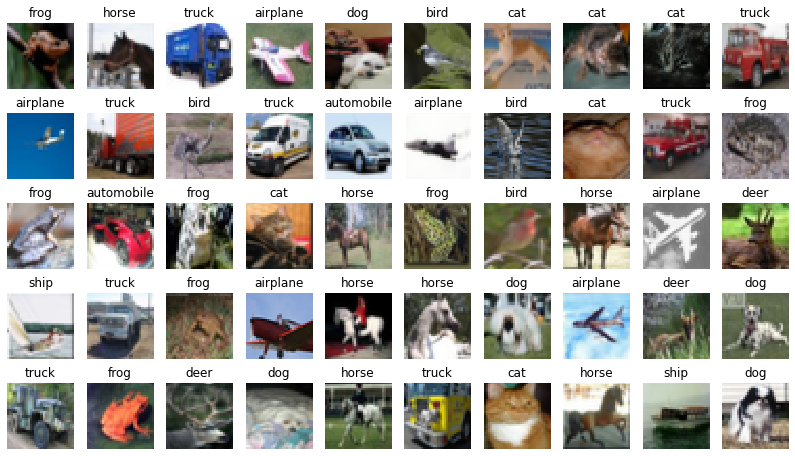

In [ ]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [ ]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)

m = np.mean(X_train, axis = 0)
s = np.std(X_train, axis = 0)
X_train = (X_train - m)/s
X_valid = (X_valid - m)/s
X_test = (X_test - m)/s


#Add one dimension to manage the channel if you are using grayscale images.
#X_train=tf.expand_dims(X_train, 3) 
#X_valid=tf.expand_dims(X_valid, 3) 
#X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


Print the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 9s 5ms/step - loss: 1.4768 - accuracy: 0.4801 - val_loss: 1.2815 - val_accuracy: 0.5548
Epoch 2/10
352/352 [==============================] - 2s 4ms/step - loss: 1.1723 - accuracy: 0.5953 - val_loss: 1.1421 - val_accuracy: 0.6020
Epoch 3/10
352/352 [==============================] - 2s 4ms/step - loss: 1.0427 - accuracy: 0.6421 - val_loss: 1.0686 - val_accuracy: 0.6344
Epoch 4/10
352/352 [==============================] - 1s 4ms/step - loss: 0.9549 - accuracy: 0.6715 - val_loss: 1.0425 - val_accuracy: 0.6392
Epoch 5/10
352/352 [==============================] - 2s 4ms/step - loss: 0.9021 - accuracy: 0.6911 - val_loss: 1.0108 - val_accuracy: 0.6540
Epoch 6/10
352/352 [==============================] - 2s 5ms/step - loss: 0.8668 - accuracy: 0.7037 - val_loss: 1.0185 - val_accuracy: 0.6582
Epoch 7/10
352/352 [==============================] - 2s 4ms/step - loss: 0.8257 - accuracy: 0.7173 - val_loss: 1.0220 - val_accuracy: 0.6560
Epoch 

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 1s - loss: 1.0497 - accuracy: 0.6452 - 640ms/epoch - 2ms/step
accuracy: 64.52%


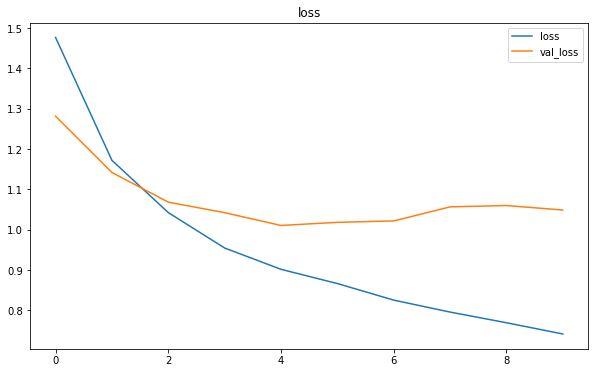

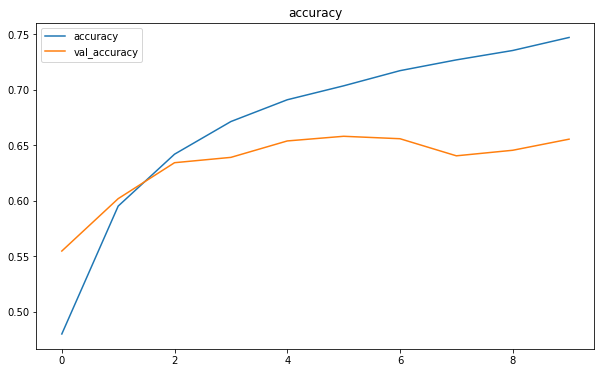

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'], label='loss')
  plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
  plt.title('loss')
  plt.legend()
  
def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
  plt.title('accuracy')
  plt.legend()
  
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

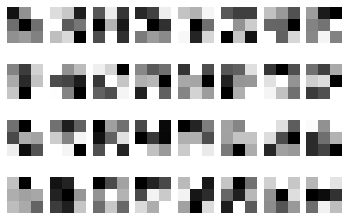

In [ ]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   In each conv2d layer we have n number of filters of size a*b with c channels. The formula for the number of parameters is, therefore, n*(1+a*b*c), including the bias term. 
2.    Thus, the first layer has 32*(1+3*3*3)=32*28=896 parameters (for 32 3x3 filters on 3 channels), and the second 16*(1+ 2*2*32)=2064 (for 16 2x2 filters on 32 channels).

Let's now train our deep CNN.

Epoch 1/10
352/352 [==============================] - 2s 6ms/step - loss: 1.5932 - accuracy: 0.4301 - val_loss: 1.3429 - val_accuracy: 0.5302
Epoch 2/10
352/352 [==============================] - 2s 5ms/step - loss: 1.2706 - accuracy: 0.5543 - val_loss: 1.2008 - val_accuracy: 0.5864
Epoch 3/10
352/352 [==============================] - 2s 5ms/step - loss: 1.1648 - accuracy: 0.5939 - val_loss: 1.1405 - val_accuracy: 0.6018
Epoch 4/10
352/352 [==============================] - 2s 5ms/step - loss: 1.0982 - accuracy: 0.6192 - val_loss: 1.1065 - val_accuracy: 0.6190
Epoch 5/10
352/352 [==============================] - 2s 5ms/step - loss: 1.0500 - accuracy: 0.6368 - val_loss: 1.0570 - val_accuracy: 0.6354
Epoch 6/10
352/352 [==============================] - 2s 5ms/step - loss: 1.0107 - accuracy: 0.6495 - val_loss: 1.0271 - val_accuracy: 0.6374
Epoch 7/10
352/352 [==============================] - 2s 5ms/step - loss: 0.9865 - accuracy: 0.6596 - val_loss: 0.9951 - val_accuracy: 0.6476
Epoch 

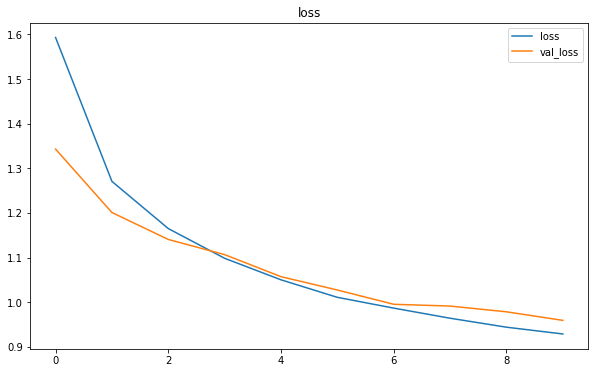

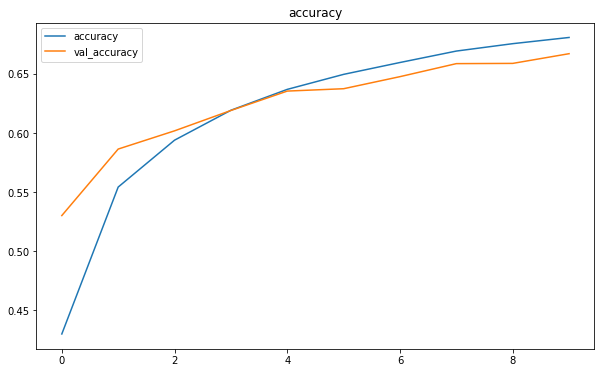

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

In [ ]:
y_train

array([[6],
       [7],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

Epoch 1/30
704/704 [==============================] - 4s 5ms/step - loss: 1.3119 - accuracy: 0.5366 - val_loss: 1.0877 - val_accuracy: 0.6244
Epoch 2/30
704/704 [==============================] - 3s 5ms/step - loss: 0.9324 - accuracy: 0.6713 - val_loss: 0.9103 - val_accuracy: 0.6874
Epoch 3/30
704/704 [==============================] - 4s 5ms/step - loss: 0.7472 - accuracy: 0.7375 - val_loss: 0.9409 - val_accuracy: 0.6836
Epoch 4/30
704/704 [==============================] - 3s 5ms/step - loss: 0.6143 - accuracy: 0.7853 - val_loss: 0.8993 - val_accuracy: 0.6980
Epoch 5/30
704/704 [==============================] - 3s 5ms/step - loss: 0.4989 - accuracy: 0.8235 - val_loss: 0.9408 - val_accuracy: 0.7068
Epoch 6/30
704/704 [==============================] - 3s 5ms/step - loss: 0.3892 - accuracy: 0.8638 - val_loss: 1.0062 - val_accuracy: 0.7042
Epoch 7/30
704/704 [==============================] - 3s 5ms/step - loss: 0.3034 - accuracy: 0.8939 - val_loss: 1.0744 - val_accuracy: 0.7076
Epoch 

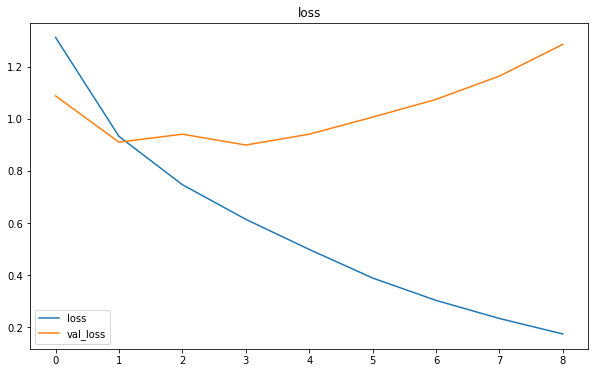

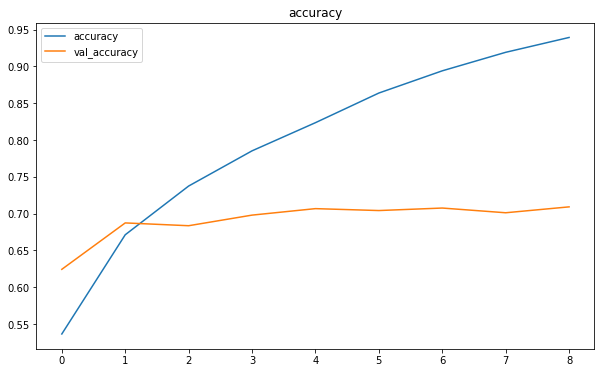

In [ ]:
model = keras.models.Sequential([
keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
keras.layers.BatchNormalization(),
keras.layers.MaxPooling2D(2, 2),
keras.layers.Conv2D(64, (3, 3), activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.MaxPooling2D(2, 2),
keras.layers.Flatten(),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(10, activation='softmax'),
])
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=5)
history = model.fit(X_train, y_train, batch_size=64, epochs=30, validation_data = (X_valid, y_valid), callbacks=[early_stopping])

print("-------------------------------------------------------------------------------------------------------------")
print("the accuracy of my best model is {}".format(model.evaluate(X_test, y_test, verbose = 2)))
print("-------------------------------------------------------------------------------------------------------------")
plot_loss(history)
plot_accuracy(history)




### [TO COMPLETE] Example of tests discussion
The best model that I found has the following architecture:
1.

1.   A 2D convolutional layer with 32 filters of size (3,3) and ReLU activation, with input shape (32,32,3).
2.  A batch normalization layer to normalize the activations.

3.  A 2D max pooling layer with pool size (2,2) to reduce the spatial dimensions of the input.

4.  A second 2D convolutional layer with 64 filters of size (3,3) and ReLU activation.

5.   A second batch normalization layer.

6.  A second 2D max pooling layer with pool size (2,2).
7.   A flatten layer to convert the multi-dimensional output of the previous layer into a 1D array.


8.   A dense layer with 128 units and ReLU activation.
9.   A final dense layer with 10 units and softmax activation to produce the final output with 10 class probabilities.


Discussion:
The model is compiled with sparse categorical cross-entropy loss, Adam optimizer, and accuracy as the metric. An early stopping callback is also specified with a patience of 5 epochs to stop training if the validation loss doesn't improve for 5 epochs. The achieved accuracy in the test set is 0,70.

Besides, I tested also other models: 
*models that use l1 and l2 regularization reduce overfitting, but at the price of a drop in accuracy, especially for l1.
*models without early stopping, which tend to overfit more, while having similar test accuracy
* wider filters of size 3x4, 4x4 and 5x5, which made little to no improvement in the results
*stochastic gradient descent as an optimizer performs poorly
* bigger number of layers tends to perform better, but at some point the increase in accuracy is undetectable
* having less than 64 filters 
* surprisingly, batch size does not give significantly different results

Discussion:
In order to best avoid overfitting, an EarlyStopping callback proved to be way more effective than using l1 and l2 regularization. Moreover, maxpooling after each Conv2D layer is also detrimental to this purpose.The best optimizer is by far ADAM.